In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df_dsa = pd.read_csv('/content/sample_data/FHDTM-P2DS-WS2425_PraktikumII.csv',encoding='latin-1')
df_dsa.head(10)

,Studienland,Kontinent,Durchschnittstemperatur_2021,Außenhandel_Export_Mrd_2015,Außenhandel_Import_Mrd_2015,1995,2000,2005,2010,2015,2020,2021
0,Östereich,Europa,"7,35",58.2,37.3,5955.0,5889.0,10174.0,27350.0,27563.0,33836,NaN
1,Niederlande,Europa,"10,39",79.2,87.9,836.0,3176.0,11896.0,23831.0,21530.0,24494,NaN
2,Vereinigtes Königsreich,Europa,"9,38",89.0,38.4,8233.0,10115.0,11600.0,14950.0,15410.0,12670,NaN
3,Schweiz,Europa,"6,42",49.1,42.1,4560.0,5142.0,7839.0,13436.0,14647.0,11932,12375.0
4,Vereinigte Staaten,Nordamerika,"10,0",113.7,60.2,9017.0,10128.0,8829.0,9458.0,10145.0,5364,8550.0
5,Türkei,Europa-Asien,"12,63",22.3,14.5,NaN,96.0,202.0,1119.0,706.0,4261,NaN
6,Frankreich,Europa,"11,57",102.8,66.8,5350.0,5378.0,6867.0,6252.0,6406.0,3823,NaN
7,Ungarn,Europa,"11,57",21.8,23.8,458.0,520.0,1403.0,2101.0,3106.0,3415,3474.0
8,China,Asien,"8,19",71.3,91.9,NaN,200.0,2736.0,4239.0,7536.0,3400,NaN
9,Dänemark,Europa,"8,92",17.6,11.8,510.0,524.0,1002.0,2508.0,3554.0,3247,NaN


In [ ]:
df_dsa.Kontinent.value_counts()

,count
Kontinent,
Europa,29
Asien,5
Nordamerika,2
Europa-Asien,2
Australien,2
Südamerika,2
Afrika,1


this tells us that , the most of trades and eduction ecxhange is in europe

In [ ]:
 df_dsa.dtypes


,0
Studienland,object
Kontinent,object
Durchschnittstemperatur_2021,object
Außenhandel_Export_Mrd_2015,float64
Außenhandel_Import_Mrd_2015,float64
1995,float64
2000,float64
2005,float64
2010,float64
2015,float64


In [ ]:
df_dsa["Durchschnittstemperatur_2021"] = pd.to_numeric(df_dsa["Durchschnittstemperatur_2021"], errors='coerce')
df_dsa.dtypes


,0
Studienland,object
Kontinent,object
Durchschnittstemperatur_2021,float64
Außenhandel_Export_Mrd_2015,float64
Außenhandel_Import_Mrd_2015,float64
1995,float64
2000,float64
2005,float64
2010,float64
2015,float64


In [ ]:
dsa_mask_eu_20c_1000s = (
    (df_dsa.Kontinent != "Europa") &
    (df_dsa.Durchschnittstemperatur_2021 > 20) &
    (df_dsa["2020"] > 1000)
)

df_dsa.loc[dsa_mask_eu_20c_1000s, "Studienland"]




,Studienland


*Data Cleaning + Smoothing*



a

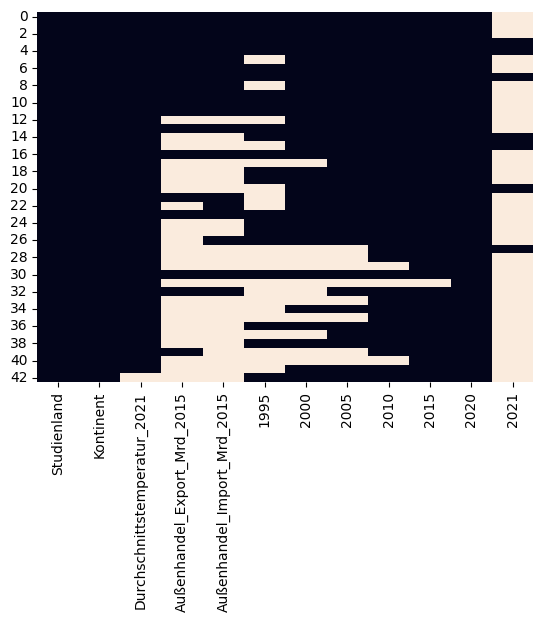

In [ ]:
plt.figure()
sns.heatmap(df_dsa.isnull(),cbar=False)
plt.show()

In [ ]:
nan_sum = df_dsa.isnull().sum()
att_wth_nan = nan_sum[nan_sum > 0].index[:3]
att_wth_nan

Index(['Durchschnittstemperatur_2021', 'Außenhandel_Export_Mrd_2015',
       'Außenhandel_Import_Mrd_2015'],
      dtype='object')

i think the reason for null values in those three att is because of the difrrent data resources that the data were collected from , so that led to inconsistent data from joning the datasets

In [ ]:
df_dsa.Durchschnittstemperatur_2021.isna().sum()


1

we will drop the null values here beacuse it was just one and will not affect the data

In [ ]:
df_dsa.dropna(subset=['Durchschnittstemperatur_2021'],inplace=True)
df_dsa.Durchschnittstemperatur_2021.isna().sum()


0

In [ ]:
df_dsa.Außenhandel_Export_Mrd_2015.isnull().sum()

23

we will fill the missing values here with the 0 as there is no matching when the orignal datasets are combined and we have 23 value

In [ ]:
df_dsa.Außenhandel_Export_Mrd_2015.fillna(0,inplace=True)

<ipython-input-25-3d3548cb9da8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dsa.Außenhandel_Export_Mrd_2015.fillna(0,inplace=True)


0

In [ ]:
df_dsa.Außenhandel_Export_Mrd_2015.isnull().sum()

0

In [ ]:
df_dsa.Außenhandel_Import_Mrd_2015.isnull().sum()

22

we will do the same here

In [ ]:
df_dsa.Außenhandel_Import_Mrd_2015.fillna(0,inplace=True)

<ipython-input-28-9893d05bf4c2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dsa.Außenhandel_Import_Mrd_2015.fillna(0,inplace=True)


In [ ]:
df_dsa

,Studienland,Kontinent,Durchschnittstemperatur_2021,Außenhandel_Export_Mrd_2015,Außenhandel_Import_Mrd_2015,1995,2000,2005,2010,2015,2020,2021
0,Östereich,Europa,"7,35",58.2,37.3,5955.0,5889.0,10174.0,27350.0,27563.0,33836,NaN
1,Niederlande,Europa,"10,39",79.2,87.9,836.0,3176.0,11896.0,23831.0,21530.0,24494,NaN
2,Vereinigtes Königsreich,Europa,"9,38",89.0,38.4,8233.0,10115.0,11600.0,14950.0,15410.0,12670,NaN
3,Schweiz,Europa,"6,42",49.1,42.1,4560.0,5142.0,7839.0,13436.0,14647.0,11932,12375.0
4,Vereinigte Staaten,Nordamerika,"10,0",113.7,60.2,9017.0,10128.0,8829.0,9458.0,10145.0,5364,8550.0
5,Türkei,Europa-Asien,"12,63",22.3,14.5,NaN,96.0,202.0,1119.0,706.0,4261,NaN
6,Frankreich,Europa,"11,57",102.8,66.8,5350.0,5378.0,6867.0,6252.0,6406.0,3823,NaN
7,Ungarn,Europa,"11,57",21.8,23.8,458.0,520.0,1403.0,2101.0,3106.0,3415,3474.0
8,China,Asien,"8,19",71.3,91.9,NaN,200.0,2736.0,4239.0,7536.0,3400,NaN
9,Dänemark,Europa,"8,92",17.6,11.8,510.0,524.0,1002.0,2508.0,3554.0,3247,NaN


In [ ]:
#ensure that alla countries have a continent by checking the null values for missing_continents
df_dsa.Kontinent.isnull().sum()

0

In [ ]:
#Verify that each country is assigned to the correct continent by reviewing unique values.
df_dsa.Kontinent.unique()


array(['Europa', 'Nordamerika', 'Europa-Asien', 'Asien', 'Australien',
       'Afrika', 'Südamerika'], dtype=object)

In [ ]:
df_dsa.loc[df_dsa.Kontinent == 'Europa-Asien', "Studienland" ]

,Studienland
5,Türkei
32,Russische Federation


we have right names of continents

In [ ]:
df_dsa.duplicated(subset=['Studienland'],keep=False).sum()

0

each country appear just one time

the possible confilict form is Semantic Conflict which arises from the combined value "Europa-Asien"